In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import keras
import tensorflow as tf
from PIL import Image
import os

In [2]:
@tf.custom_gradient
def guidedRelu(x):
  def grad(dy):
    return tf.cast(dy>0,"float32") * tf.cast(x>0, "float32") * dy
  return tf.nn.relu(x), grad

In [3]:
model = keras.models.load_model('best_model.h5')

In [5]:
gb_model = keras.models.Model(inputs = [model.inputs],
                             outputs = [model.get_layer("conv2d_4").output])

In [6]:
layer_dict = [layer for layer in gb_model.layers[1:] if hasattr(layer,'activation')]

In [8]:
for layer in layer_dict:
  if layer.activation == tf.keras.activations.relu:
    layer.activation = guidedRelu

In [15]:
classes = ['Amphibia',
 'Animalia',
 'Arachnida',
 'Aves',
 'Fungi',
 'Insecta',
 'Mammalia',
 'Mollusca',
 'Plantae',
 'Reptilia']

In [16]:
test_imgs = []
pref = '../inaturalist_12K/'
test_path = pref+'test/'
labels = np.zeros((30,10))
cnt = 0
for i in range(10):
    lst = os.listdir(test_path+classes[i])
    idxs = np.random.choice(len(lst),3)
    for j in idxs:
        img = Image.open(test_path+classes[i]+'/'+lst[j])
        img = img.resize((224,224))
        test_imgs.append(np.asarray(img)*1./255)
        labels[cnt,i] = 1
        cnt+=1
        
# test_imgs = np.array(test_imgs)

In [33]:
with tf.GradientTape() as tape:
  inputs = tf.cast(test_imgs, tf.float32)
  tape.watch(inputs)
  outputs = gb_model(inputs)

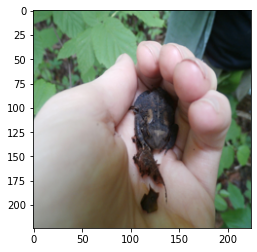

In [29]:
plt.imshow(inputs[1])

In [34]:
grads = tape.gradient(outputs,inputs)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 223.5, 223.5, -0.5)

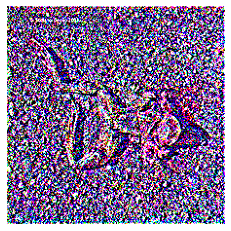

In [35]:
plt.imshow(grads[2])
plt.axis("off")